In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [221]:
#Wczytanie pliku animals.csv
data = pd.read_csv('animals.csv')
#Zastąpienie Na zerami 
data.fillna(0,inplace=True)
#Oderwanie kolumny z nazwami zwierzat
animals = data.pop('Unnamed: 0')
#Dodanie opisów kolumn
columns = ("warm-blooded","can fly","vertebrate","endangered","live in groups","have hair")
data.columns = columns


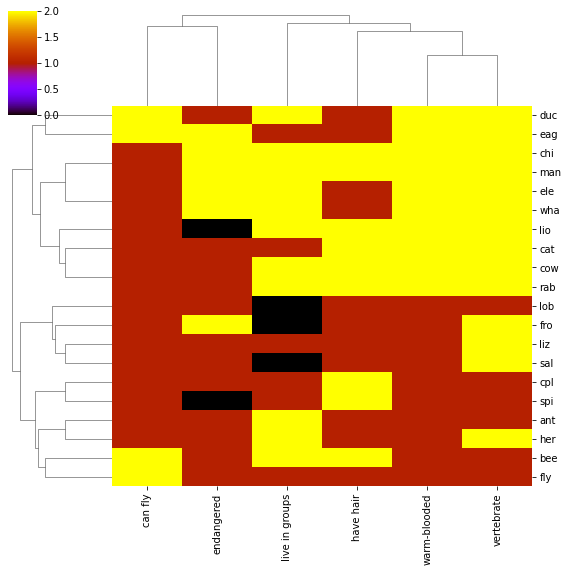

In [222]:
sns.clustermap(data,cmap="gnuplot",yticklabels=animals,figsize=(8,8),row_cluster=True);

Kolor żółty pokazuje że dany osobnik posiada pewną cechę, kolor czerwony brak cechy zaś kolor czarny świadczy o braku danych. Klasteryzacja zdaje się być poprawną ze względu na klasyfikację pszczoły i muchy czy też kaczki z orłem. (na podstawie zdolności latania) 

In [223]:
#Wczytanie zbioru IRIS z pliku 
iris = pd.read_csv('iris.csv')
iris

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [229]:
#Kombinacja zmiennych 
comb = [[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)],
 [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)],
 [(0, 1, 2, 3)]]

In [230]:
#Zmiana klas z typu znakowego na liczbowy 
def replace_class(variety):
    if variety =='Setosa':
        return 0
    elif variety == 'Versicolor':
        return 1
    elif variety == 'Virginica':
        return 2

iris['class'] = iris['variety'].apply(replace_class)

In [231]:
#Skuteczność klasteryzacji dla wszyskitch kombinacji(comb) zmiennych
acc = []
for i in comb:
    for j in range(len(i)):
        x = iris.iloc[:,list((i[j]))].values
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(x)
        acc.append(accuracy_score(iris['class'],kmeans.labels_))

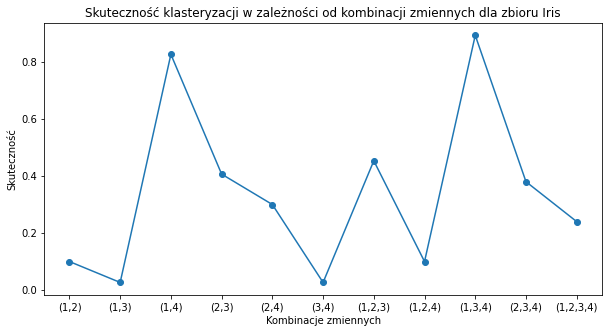

In [232]:
# Wykres skuteczności klasteryzacji w zależności od kombinacji zmiennych 
comb_labels = ['(1,2)','(1,3)','(1,4)','(2,3)','(2,4)','(3,4)','(1,2,3)','(1,2,4)','(1,3,4)','(2,3,4)','(1,2,3,4)']

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Kombinacje zmiennych")
ax.set_ylabel("Skuteczność")
ax.set_title("Skuteczność klasteryzacji w zależności od kombinacji zmiennych dla zbioru Iris")
ax.plot(comb_labels, acc, marker='o')
plt.show()

Na podstawie powyższego wykresu obserwujemy, że skuteczność klasteryzacji znacząco zależy od kombinacji zmiennych użytych do klasteryzacji, algorytm k-srednich wykazuję wysoką skuteczność tylko dla pewnych kombinacji. Niska skuteczność może być spowodowana niefortunnym doborem zmiennych, który powodował w pierwszych krokach klasteryzacji błędy rzutujące na dalsze klasteryzowanie. 